<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Gerardo Ruiz Velasco y Eduardo Loza de la Torre

**Fecha:** 17 de marzo del 2021.

**Expediente** : 715878 | 713423. 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link GitHub:https://github.com/EduardoLoza/ProyectoModulo1_delaTorreE_VelascoG**

### Proyecto Módulo 1

### Índice de entregables.

> [Entregable 1: Descripción del  problema](#Entregable1)

> [Entregable 2: Obtención de base de datos](#Entregable2)


## Entregable1
### 1.1 Título del trabajo.
> Simulación de los momios de apuestas de la Premier League en las últimas 5 temporadas.
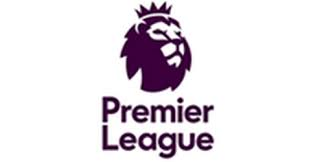

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
>  - Conseguir un momio adecuado para campeón de la temporada.
>  - Simular los momios de resultados finales de todos los partidos de las 5 temporadas.
> #### 1.2 Objetivos específicos
>  - Definir nodos y variables que se quieren simular.
>  - Obtener la base de datos que tenga esas variables.
>  - Escoger equipos a simular.
>  - Computar un modelo para cada uno de los equipos(Nodos) con un código óptimo y funcional.
>  - Mostrar momios esperados y cumplir con la hipótesis.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos


### 1.3 Definición del Problema.

> Después del 2008 el mundo se dio cuenta que los mercados financieros son muy volátiles y son controlados por capitales que en su mayoría se encuentran fuera del alcance de la mayoría de las personas. Después de este suceso se empezó a migrar a nuevas técnicas de hacer que el dinero crezca a base de una inversión. El mercado de las apuestas deportivas es un área de oportunidad que muy pocos ven por su nivel de riesgo, ya que tiene una particularidad, se gana muy bien pero también se puede perder todo el capital invertido en un abrir y cerrar de ojos. 

>En este proyecto trataremos de modelar situaciones deportivas como el campeonato inglés el cual está catalogado como el más competitivo y por ende más diversificado en los momios deportivos. En la mayoría de los casos las personas pierden su dinero porque apuestan por sentimiento sin analizar ningún dato. Este proyecto se basaría en datos históricos como los momios deportivos.

>Ya con los momios calcularíamos la probabilidad de que el equipo seleccionado gane el partido en base a él momio. Mediante el uso de una distribución, la cual decidiremos cual usar dependiendo de los datos, podremos simular el ganador de un partido, este proceso lo podríamos repetir con cualquier equipo y poder usarlo para otras apuestas. Y así poder diversificar el portafolio de apuestas. 


### 1.4 Nodos y variables que se decidieron simular y porqué

> Los Nodos se asignaron a los equipos campeones o subcampeones en la Premier League las últimas 4 temporadas. 
> #### Nodo 1: Chelsea. 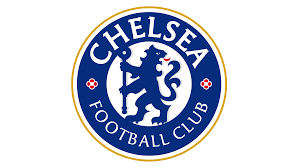
> - Se escogió el equipo Chelsea como Nodo, ya que fue el campeón en la temporada 2016-2017.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 2: Manchester United. 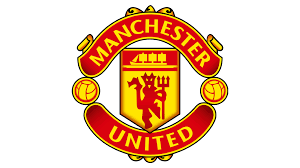
> - El equipo Manchester United se eligió como Nodo, ya que fue el subcampeón en la temporada 2017-2018.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 3: Manchester City. 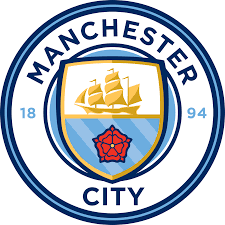
> - Manchester city ha sido el equipo que más veces ha aparecido en el pálmares ingles en los últimos años, por esa razón su aparición es importante en el proyecto.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

> #### Nodo 4: Liverpool. 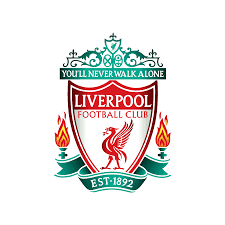
> - El equipo Liverpool se escogió ya que fue el campeón de la última temporada.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

### 1.5 Definición de hipótesis y supuestos.
> Las hipótesis planteadas son :
1. Los momios de los 4 equipos al ser los mejores estan correlacionados. 
2. Al ser los mejores 4 equipos de la liga, planteamos que los mosmios estarán en distribuciones que tengan una forma de campana caragada a la izquierda ( valores cercanos a cero). Las distribuciones pueden ser (Log-norm, Johnsonsu, Alpha, etc.) 

Los supuestos con los que el proyecto arrancará para facilitar el proceso son:
1.	Los datos visitante y local son independientes.
2.	El equipo siempre es el mismo. Es decir, se consideran los datos del equipo como uno y no de los jugadores como individuos.
3.	El equipo será el mismo durante los años que se tomen para la simulación, es decir que cualquier cambio en su desempeño no e considerará para la simulación, aunque si se pondría como una nota externa. 
4.	Todas las competiciones oficiales son tomadas en cuenta por el carácter "oficial". Los amistosos e interescuadras quedarán excluidos de la base de datos. Esto con el fin de tomar filtrar los datos como "serios".
5.	Los momios asignados se tomaran con el mismo criterio para cualquier equipo durante los años que se lleve a cabo la simulación. 


## Entregable2

### 1.6 Obtención de bases de datos.
> Para realizar este proyecto se descargaron los datos de la página https://www.football-data.co.uk/englandm.php donde hay datos estadísticos recopilados desde el inicio de la liga hasta la actualidad.

> En el caso del proyecto esgimos descargar el conjunto de datos de las últimas 5 temporadas de la Premier League, donde se pueden encontrar los datos estadísticos de los partidos además de los momios de diferentes casas de apuestas para los partidos. Para realizar los cuatro nodos decidimos solo recurrimos a los datos de los 4 mejores equipos en base a los pálmares de la liga.


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm
from sklearn.model_selection import GridSearchCV
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib
from collections import defaultdict
from time import time
import statsmodels.api as sm
from IPython.display import Markdown as md

C:\Users\Pica\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
from scipy.stats import alpha,  anglit,  arcsine,  beta,  betaprime,  bradford,  burr,  cauchy,  chi,  chi2,  cosine,  dgamma,  dweibull,  erlang,  expon,  exponnorm,  exponweib,  exponpow,  f,  fatiguelife,  fisk,  foldcauchy,  foldnorm,  frechet_r,  frechet_l,  genlogistic,  genpareto,  gennorm,  genexpon,  genextreme,  gausshyper,  gamma,  gengamma,  genhalflogistic,  gilbrat,  gompertz,  gumbel_r,  gumbel_l,  halfcauchy,  halflogistic,  halfnorm,  halfgennorm,  hypsecant,  invgamma,  invgauss,  invweibull,  johnsonsb,  johnsonsu,  ksone,  kstwobign,  laplace,  levy,  levy_l,  levy_stable,  logistic,  loggamma,  loglaplace,  lognorm,  lomax,  maxwell,  mielke,  nakagami,  ncx2,  ncf,  nct,  norm,  pareto,  pearson3,  powerlaw,  powerlognorm,  powernorm,  rdist,  reciprocal,  rayleigh,  rice,  recipinvgauss,  semicircular,  t,  triang,  truncexpon,  truncnorm,  tukeylambda,  uniform,  vonmises,  vonmises_line,  wald,  weibull_min,  weibull_max,  wrapcauchy

In [3]:
def kde_scipy_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x: kde.evaluate(x)

def kde_sklearn_f(x, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis]))
    return log_pdf

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.20.1
  scipy: 1.1.0
  statsmodels: 0.9.0


In [4]:
functions = dict(zip(kde_funcnames, kde_funcs))


def plot_scaling(N=1000, bandwidth=0.1, rtol=0.0,
                 Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling of KDE algorithms.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    for name in functions:
        if name not in kwds:
            kwds[name] = {}
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        kwds['Scikit-learn']['rtol'] = rtol_i
        for name, func in functions.items():
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                func(x, xgrid, bw_i, **kwds[name])
                t1 = time()
                t += (t1 - t0)
            times[name].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for name in kde_funcnames:
            ax.loglog(N, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for name in kde_funcnames:
            ax.loglog(bandwidth, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for name in kde_funcnames:
            ax.loglog(rtol, times[name], label=name, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_scaling_vs_kernel(kernels, N=1000, bandwidth=0.1, rtol=0.0,
                           Nreps=3, kwds=None, xgrid=None):
    """
    Plot the time scaling for Scikit-learn kernels.
    Either N, bandwidth, or rtol should be a 1D array.
    """
    if xgrid is None:
        xgrid = np.linspace(-10, 10, 5000)
    if kwds is None:
        kwds=dict()
    times = defaultdict(list)
    
    B = np.broadcast(N, bandwidth, rtol)
    assert len(B.shape) == 1
    
    for N_i, bw_i, rtol_i in B:
        x = np.random.normal(size=int(N_i))
        for kernel in kernels:
            kwds['kernel'] = kernel
            kwds['rtol'] = rtol_i
            t = 0.0
            for i in range(Nreps):
                t0 = time()
                kde_sklearn(x, xgrid, bw_i, **kwds)
                t1 = time()
                t += (t1 - t0)
            times[kernel].append(t / Nreps)
            
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    plot_kwds={'linewidth':3, 'alpha':0.5}
    
    if np.size(N) > 1:
        for kernel in kernels:
            ax.loglog(N, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Number of points')
    elif np.size(bandwidth) > 1:
        for kernel in kernels:
            ax.loglog(bandwidth, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Bandwidth')
    elif np.size(rtol) > 1:
        for kernel in kernels:
            ax.loglog(rtol, times[kernel], label=kernel, **plot_kwds)
        ax.set_xlabel('Relative Tolerance')
        
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')
    ax.legend(loc=0)
    ax.set_ylabel('time (seconds)')
    ax.set_title('Execution time for KDE '
                 '({0} evaluations)'.format(len(xgrid)))
    
    return times


def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
    
    
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    
    
# Definimos la función para que nos diga el porcentaje de aceptadas en ambos casos
def histograma(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1) #Evalua f en el vector R1
    t_x = t(R1) #Evalua t en el vector R1
    condition = R2*t_x <=f_x
    barras = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.hist(barras,50,density=True)
    plt.xlabel('valores aleatorios')
    plt.ylabel('probabilidad')
    plt.title('histograma función creada')
    plt.show()
    return




In [5]:

data2021=pd.read_csv('E0.csv')
data2021.set_index('Date',inplace=True)
data1920=pd.read_csv('E0 (4).csv')
data1920.set_index('Date',inplace=True)
data1819=pd.read_csv('E0 (3).csv')
data1819.set_index('Date',inplace=True)
data1718=pd.read_csv('E0 (2).csv')
data1718.set_index('Date',inplace=True)
data1617=pd.read_csv('E0 (1).csv')
data1617.set_index('Date',inplace=True)
data1 = data1617.append(data1718).append(data1819)
data1.index= range(data1.shape[0])
data2 = data1920.append(data2021)
data2.index= np.arange(1140,1796,1)
data=pd.concat([data1,data2],join='inner',axis=0)
data=data.loc[:,['HomeTeam','AwayTeam','B365H','B365A']]
data

,HomeTeam,AwayTeam,B365H,B365A
0,Burnley,Swansea,2.40,3.25
1,Crystal Palace,West Brom,2.00,4.50
2,Everton,Tottenham,3.20,2.40
3,Hull,Leicester,4.50,1.91
4,Man City,Sunderland,1.25,15.00
...,...,...,...,...
1791,Man City,Man United,1.45,7.00
1792,Tottenham,Crystal Palace,1.45,7.00
1793,Chelsea,Everton,1.53,6.50
1794,West Ham,Leeds,2.05,3.50


In [6]:
cheh = data[data['HomeTeam'] == 'Chelsea' ]
chea = data[data['AwayTeam'] == 'Chelsea' ]#primer nodo
ch1=cheh['B365H']
ch2=chea['B365A']
chelsea = pd.concat([ch1,ch2],join='inner',axis=0)

Muh = data[data['HomeTeam'] == 'Man United' ]
Mua = data[data['AwayTeam'] == 'Man United' ]#segundo nodo
mu1=Muh['B365H']
mu2=Mua['B365A']
Mu = pd.concat([mu1,mu2],join='inner',axis=0)

Mch = data[data['HomeTeam'] == 'Man City' ]
Mca = data[data['AwayTeam'] == 'Man City' ]#Tercer nodo
Mch1=Mch['B365H']
Mch2=Mca['B365A']
City = pd.concat([Mch1,Mch2],join='inner',axis=0)

livh = data[data['HomeTeam'] == 'Liverpool' ]
liva = data[data['AwayTeam'] == 'Liverpool' ]#Cuarto nodo

> #### Nodo 1: Chelsea. 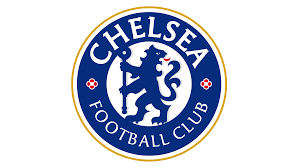
> - Se escogió el equipo Chelsea como Nodo, ya que fue el campeón en la temporada 2016-2017.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

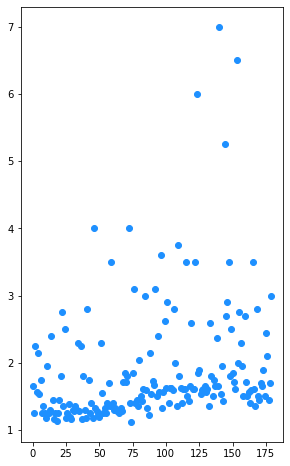

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(chelsea)),chelsea,color='dodgerblue')

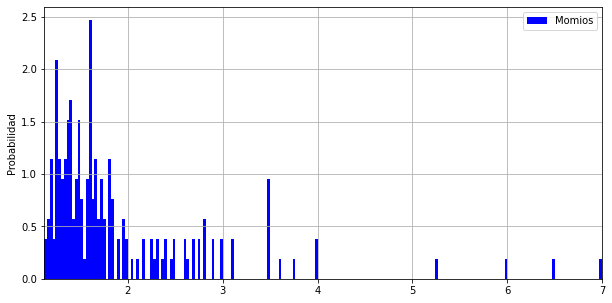

In [8]:
suic=pd.DataFrame({'chelsea': (chelsea.iloc[1:,])})
list_acc=list(chelsea.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='blue')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

In [9]:
chelsea1=chelsea[(np.abs(st.zscore(chelsea)) < 2.5)]
chelsea1

9       1.65
20      1.25
40      2.25
72      1.57
88      2.15
        ... 
1700    2.45
1734    2.10
1743    1.45
1758    1.70
1784    3.00
Length: 176, dtype: float64

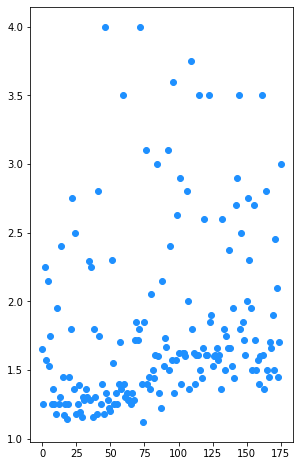

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(chelsea1)),chelsea1,color='dodgerblue')

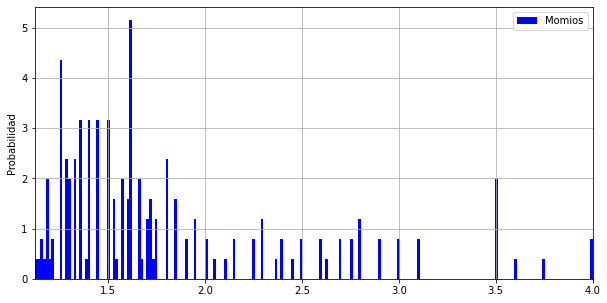

In [11]:
suic=pd.DataFrame({'chelsea': (chelsea1.iloc[1:,])})
list_acc=list(chelsea1.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='blue')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

### Método de Máxima Verosimilitud (MLE)

Text(0, 0.5, 'Frecuencia')

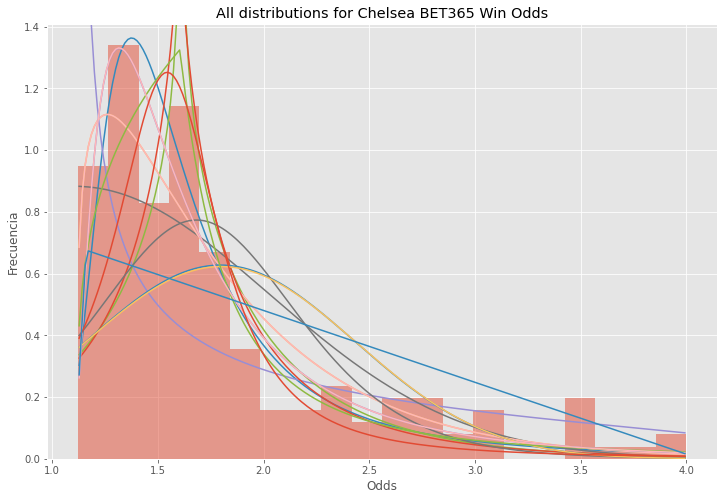

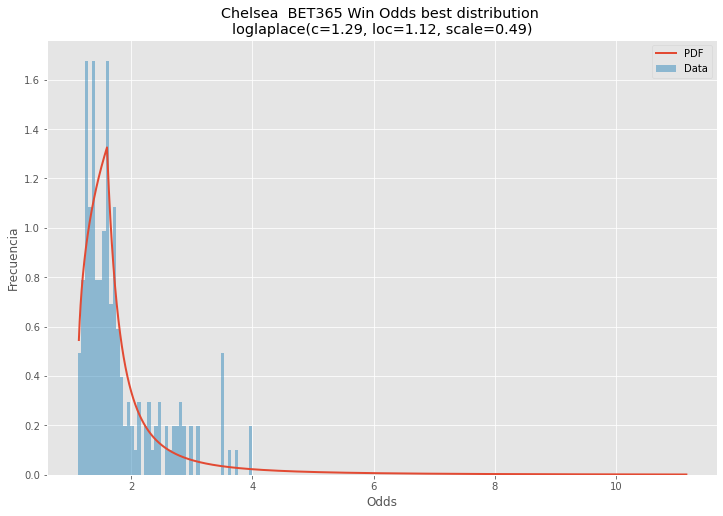

In [12]:
data = chelsea1
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    #DISTRIBUTIONS = [        
        #st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        #st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        #st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        #st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        #st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        #st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        #st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        #st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        #st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    #]

    DISTRIBUTIONS = [st.alpha, st.beta, st.chi,st.chi2,st.dgamma, st.gamma,st.gennorm, st.norm,st.johnsonsu, st.logistic,st.loggamma,
                    st.loglaplace,st.lognorm, st.t, st.triang]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Chelsea BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Chelsea  BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

In [13]:
dist_chelsea,parametros_che=best_fit_distribution(chelsea1)
dist_chelsea,parametros_che

('loglaplace', (1.293416614713305, 1.1166129738379094, 0.4878021367731822))

Tenemos que nuestra mejor distribución es $loglaplace$ con parámetros (c=1.29,loc=1.12,scale=0.49).

### Kernel Density Estimation (KDE)

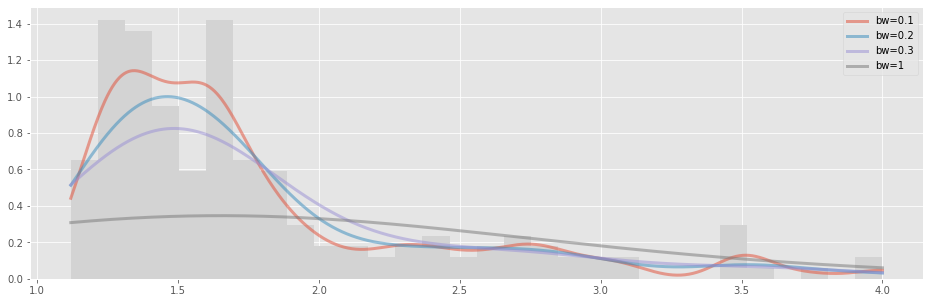

In [15]:
x_grid = np.linspace(min(chelsea1),max(chelsea1), 1000)
fig, ax = plt.subplots()
for bandwidth in [.1,.2,.3,1]:
    ax.plot(x_grid, kde_sklearn(chelsea1,x_grid, bandwidth=bandwidth),
        label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(chelsea1, 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
#ax.set_xlim(1, 5)
ax.legend(loc='upper right')

{'bandwidth': 0.1}


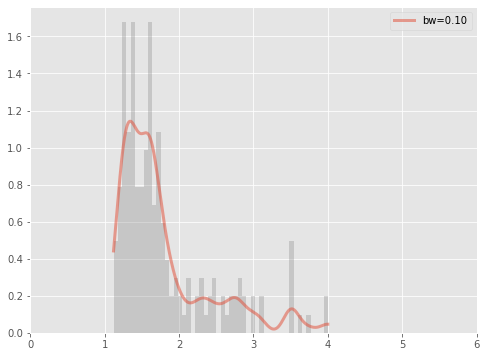

In [16]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(chelsea1[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(chelsea1, bins=50, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 6);

Se observa que el mejor bandwidth es de 0.1.

### Método Aceptación-Rechazo

In [17]:
def kde_sklearn(x, x_grid, bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

El máximo de f es: 1.1419953821076672


C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


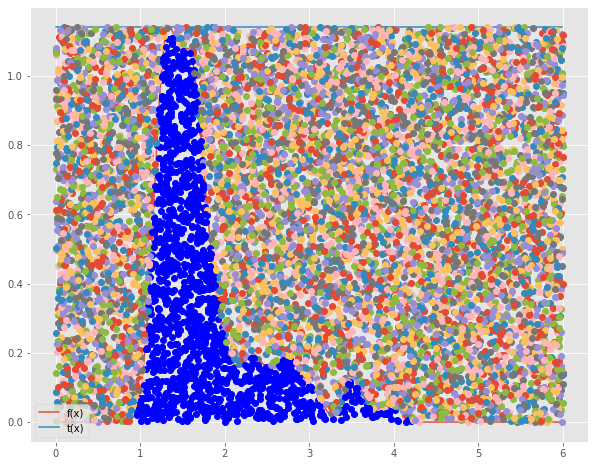

In [18]:
# Función objetivo 
x_grid = np.linspace(0, 6, 1000)
data1 = np.asarray(pd.Series(chelsea1))
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
# Máximo de la función f
max_f = max(f(x))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,6,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
Acep_rechazo(R2,R1,f,t)

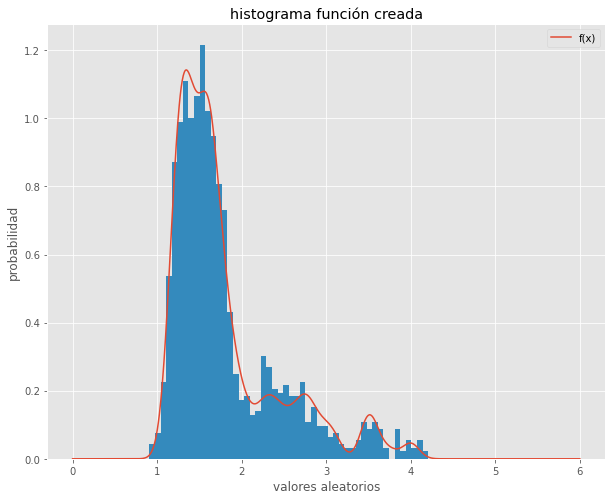

In [19]:
# Función objetivo 
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
x = np.linspace(0,6,1000) # Rango donde se graficará las funciones
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
histograma(R2, R1, f, t)

## Prueba de Kolmogorov-Smirnov

In [20]:
DISTRIBUTIONS = ['alpha', 'beta', 'chi','chi2','dgamma', 'gamma','gennorm', 'norm','johnsonsu', 'logistic','loggamma',
                    'loglaplace','lognorm', 't', 'triang']
results = []
for i in DISTRIBUTIONS:
    dist = getattr(st,i)
    param = dist.fit(data)
    a = st.kstest(data, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


lognorm: statistic=0.047946713718395984, pvalue=0.7949240881160371
johnsonsu: statistic=0.048177124091068446, pvalue=0.7901880257127291
alpha: statistic=0.052135753124811335, pvalue=0.7049722379973697
loglaplace: statistic=0.08186032619619574, pvalue=0.17879360588698112
gamma: statistic=0.08962413644642664, pvalue=0.11127017163964603
chi2: statistic=0.08963037932382689, pvalue=0.111225804227992
gennorm: statistic=0.15236082265040735, pvalue=0.0004941865886772893
t: statistic=0.15252710114610393, pvalue=0.00048531111706783713
logistic: statistic=0.15446578926511156, pvalue=0.00039229253174528455
dgamma: statistic=0.1586109252289829, pvalue=0.00024663098701680446
chi: statistic=0.16279484482559825, pvalue=0.00015243789074032468
loggamma: statistic=0.20648867274169846, pvalue=4.651930954738216e-07
norm: statistic=0.20741088167455224, pvalue=4.0544440654118566e-07
beta: statistic=0.21096201311839885, pvalue=2.3739051152511118e-07
triang: statistic=0.3068417531768189, pvalue=3.2985957916858

La distribución $loglaplace$ no pasa la prueba de Kolmogorov-Smirnov, por lo tanto se utilizará la distribución **Lognormal** ya que fue la mejor en la prueba.

### Método Quantil-Quantil

####  LOGNORM

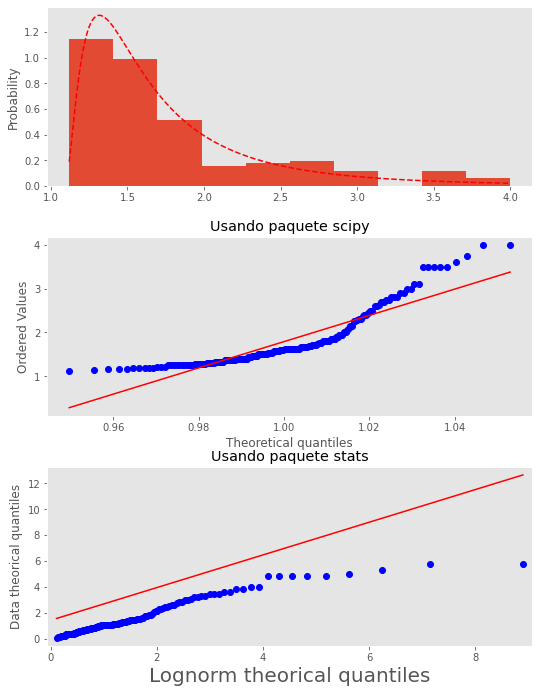

In [21]:
measurements = chelsea1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'lognorm'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements, dist=dist, line='s', fit=True, ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Prueba chi cuadrada

**Para los datos de los momios**


$H_0$: LOGNORM es la distribución de los valores 

$H_a$: LOGNORM no es la distribución de los valores 

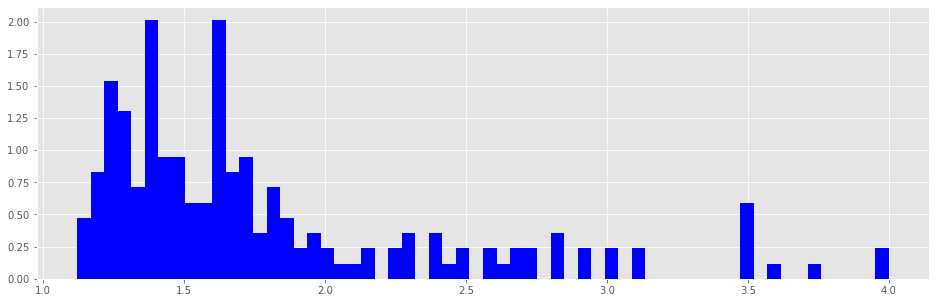

media muestral =2.536000, desviación estándar muestral =0.831269
media real =1.893111, desviación real muestral =0.910106


In [22]:
# Prueba chi-cuadrada
J = 60  # Cantidad de particiones del histograma
[freqs,xs,p]=plt.hist(chelsea1,J,density=True, color='blue')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xs = xs[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xs)
sigmas = np.std(xs)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(chelsea.mean(),chelsea.std()))

In [23]:
pi = st.mielke.pdf(xs,params[0],params[1],params[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = xs*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(chelsea.mean(),chelsea.std()))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=29.608419508466127, pvalue=0.9995083140342783)
Estadístico de chi_cuadrado =  74.46832415930936
Media muestral = 2.536000 
Desviación estándar muestral =0.831269 
media real =1.893111, desviación real muestral =0.910106


Como podemos observar el $p value>0.05$ por lo tanto se acepta la $H_0$

### Montecarlo

(array([5.37405285e-01, 5.15749825e-02, 9.34985063e-03, 3.07640246e-03,
        1.02546749e-03, 4.22251319e-04, 1.80964851e-04, 0.00000000e+00,
        1.20643234e-04, 6.03216170e-05]),
 array([ 1.13024629,  2.78802678,  4.44580728,  6.10358777,  7.76136827,
         9.41914876, 11.07692926, 12.73470975, 14.39249025, 16.05027074,
        17.70805124]),
 <a list of 10 Patch objects>)

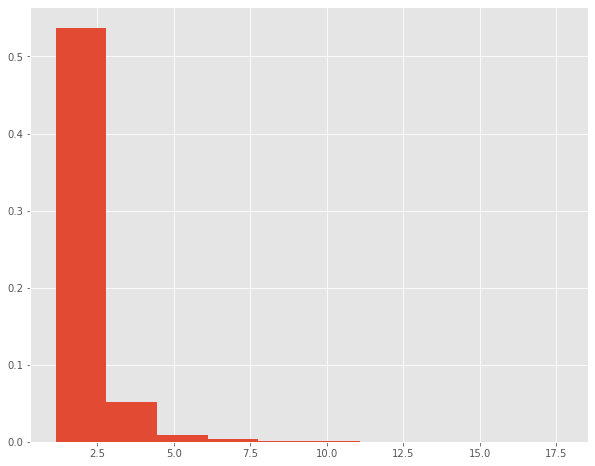

In [49]:
#histograma
Chehw=lognorm.rvs(params[0],params[1],params[2], size = N)
plt.figure(figsize=(10,8))
plt.hist(Chehw,density=True)

In [25]:
def simuladorganar(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector'):
    aleatorio= np.random.randint(CantMuestras)
    Momios= Vector[aleatorio]
    return Momios
def mediaM(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCMomios= [simuladorganar(Vector, CantMuestras) for i in range(N)]
    MeanMCMomios= np.mean(MCMomios)
    return MeanMCMomios
def DESVM(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCMomios= [simuladorganar(Vector, CantMuestras) for i in range(N)]
    DESVMCMomios= np.std(MCMomios)
    return DESVMCMomios

In [26]:
MOMIO_CHELSEA=mediaM(Chehw,N,N)
STD_MOMIO=DESVM(Chehw,N,N)
MOMIO_CHELSEA

1.8154363713262203

### Intervalos de Confianza

In [27]:
confianza = 0.95
u = np.random.uniform(MOMIO_CHELSEA, STD_MOMIO,10000)  
st.sem
ic1 = st.t.interval(confianza,MOMIO_CHELSEA-1, loc=MOMIO_CHELSEA, scale=st.sem(u))
ic2 = st.norm.interval(confianza, loc=MOMIO_CHELSEA, scale=st.sem(u))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,ic1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,ic2))
print('Media calculada' , MOMIO_CHELSEA)

Con una confianza de 0.95 la media estará en el intervalo t,
 (1.7460614624493092, 1.8848112802031314)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (1.8092546849395679, 1.8216180577128727)
Media calculada 1.8154363713262203


### Conclusión Nodo 1

El momio esperado para Chelsea en el caso que sea campeón es de 1.815 con un posible cambio entre el intervalo $(1.81, 1.82)$, todo esto con un 95% de confianza.

> #### Nodo 2: Manchester United. 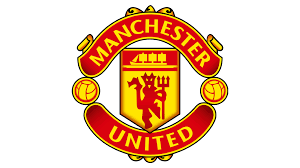
> - El equipo Manchester United se eligió como Nodo, ya que fue el subcampeón en la temporada 2017-2018.
> - Las variables a simular son los momios ganadores del equipo. Todo esto para conocer el valor esperado del momio.

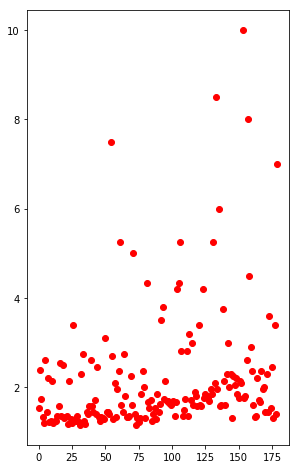

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(Mu)),Mu,color='red')

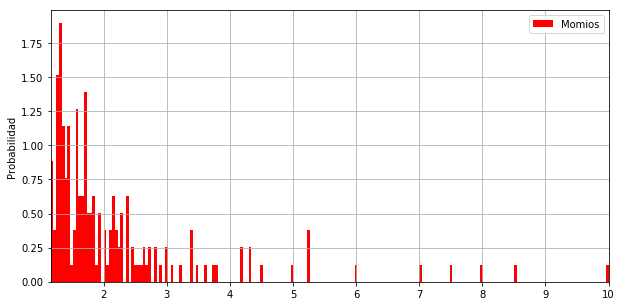

In [8]:
suic=pd.DataFrame({'Man U': (Mu.iloc[1:,])})
list_acc=list(Mu.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='red')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

In [9]:
Mu1=Mu[(np.abs(st.zscore(Mu)) < 2)]
Mu1

10      1.53
34      2.38
53      1.73
68      1.33
91      1.20
        ... 
1702    1.53
1719    2.45
1750    1.30
1775    3.40
1781    1.40
Length: 170, dtype: float64

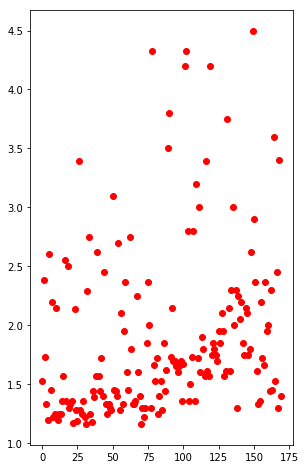

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(Mu1)),Mu1,color='red')

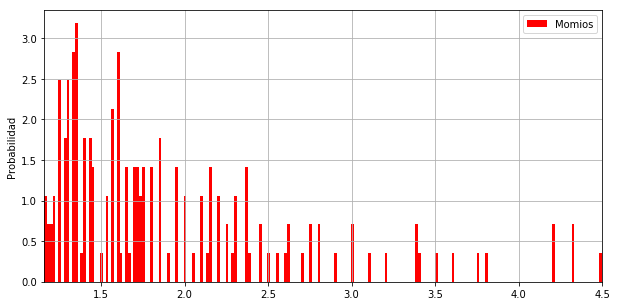

In [11]:
suic=pd.DataFrame({'Man U': (Mu1.iloc[1:,])})
list_acc=list(Mu1.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='red')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

In [12]:
Mu1

10      1.53
34      2.38
53      1.73
68      1.33
91      1.20
        ... 
1702    1.53
1719    2.45
1750    1.30
1775    3.40
1781    1.40
Length: 170, dtype: float64

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


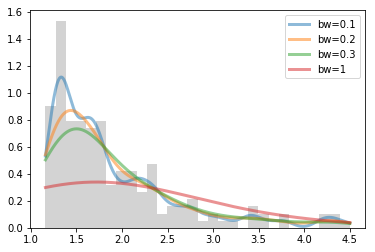

In [13]:
x_grid = np.linspace(min(Mu1),max(Mu1),1000)
fig, ax = plt.subplots()
for bandwidth in [.1,.2,.3,1]:
    ax.plot(x_grid, kde_sklearn(Mu1,x_grid, bandwidth=bandwidth),
        label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(Mu1, 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
#ax.set_xlim(1, 5)
ax.legend(loc='upper right')

{'bandwidth': 0.1}


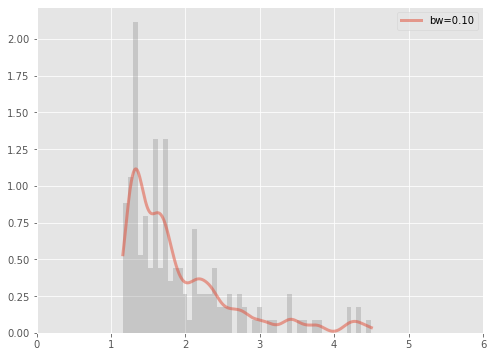

In [35]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(Mu1[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(Mu1, 50, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 6);

In [14]:
def kde_sklearn(x, x_grid, bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


El máximo de f es: 1.1148971105531829


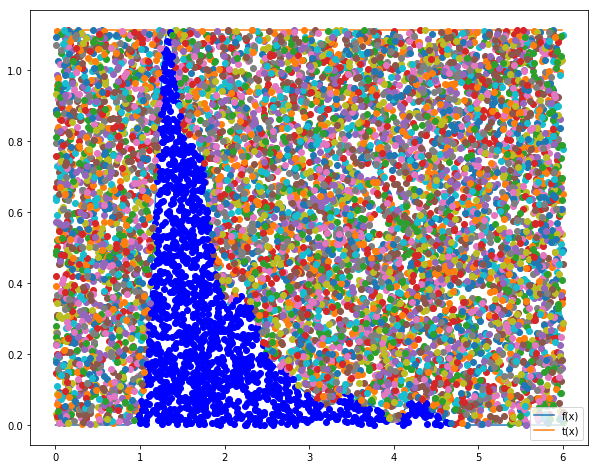

In [16]:
# Función objetivo 
x_grid = np.linspace(0, 6, 1000)
data1 = np.asarray(pd.Series(Mu1))
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
# Máximo de la función f
max_f = max(f(Mu1))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,6,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
Acep_rechazo(R2,R1,f,t)

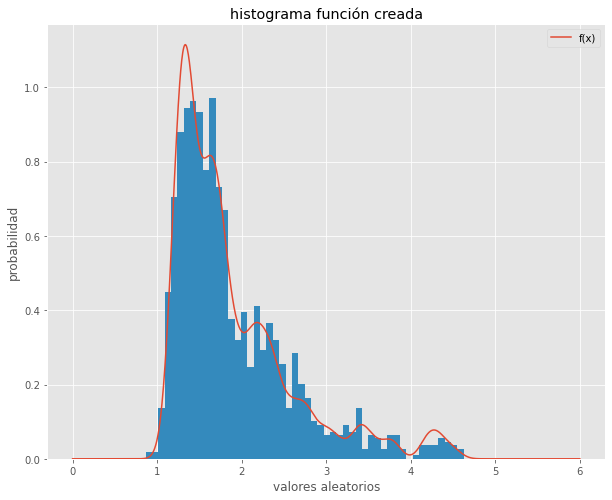

In [38]:
# Función objetivo 
data1 = np.asarray(pd.Series(Mu1))
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
x = np.linspace(0,6,1000) # Rango donde se graficará las funciones
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
histograma(R2, R1, f, t)

Graficamente está muy claro que el mejor bandwidth es de 0.1.

### Método de Máxima Verosimilitud (MLE)

Text(0, 0.5, 'Frecuencia')

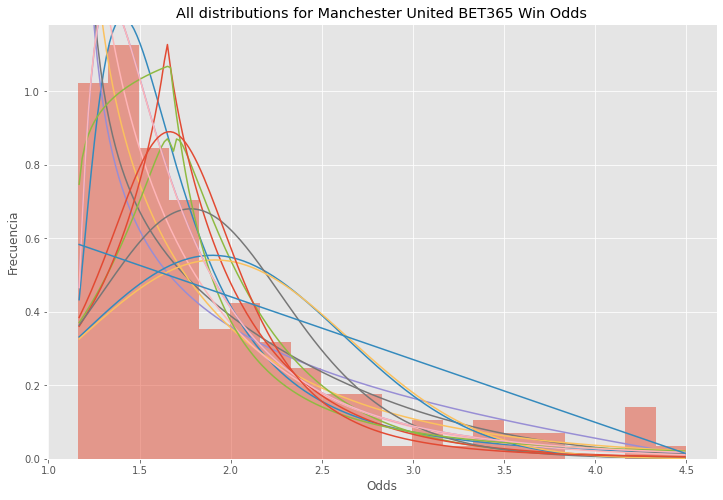

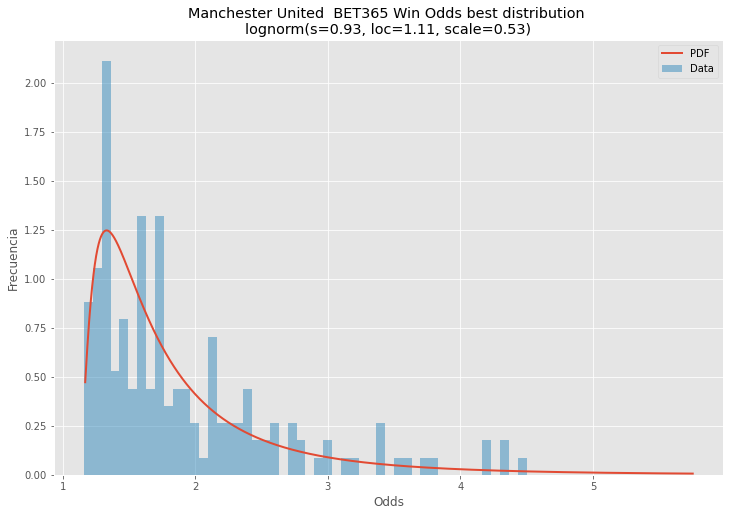

In [39]:
data = Mu1
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')

# Load data from statsmodels datasets
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Manchester United BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Manchester United  BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

Se observa graficamente que según el método, los datos se distribuyen como una distribución $lognormal$ con parámetros $(s=0.93,loc=1.11,scale=0.53)$

## Prueba de Kolmogorov-Smirnov

In [40]:
DISTRIBUTIONS = ['alpha', 'beta', 'chi','chi2','dgamma', 'gamma','gennorm', 'norm','johnsonsu', 'logistic','loggamma',
                    'loglaplace','lognorm', 't', 'triang']
results = []
for i in DISTRIBUTIONS:
    dist = getattr(st,i)
    param = dist.fit(data)
    a = st.kstest(data, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Usuario\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4963: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


lognorm: statistic=0.05825154641604591, pvalue=0.5904757532921494
johnsonsu: statistic=0.058538973740828226, pvalue=0.5842304017332272
alpha: statistic=0.07970680309482381, pvalue=0.2183552221151459
loglaplace: statistic=0.08890332525363667, pvalue=0.12809507493110117
chi2: statistic=0.12659145359840962, pvalue=0.007807774184790251
gamma: statistic=0.12880968549081057, pvalue=0.0064226950835799355
beta: statistic=0.1304244391055689, pvalue=0.005559640958720124
chi: statistic=0.13565976234137322, pvalue=0.0034390843744097526
logistic: statistic=0.1558480153370887, pvalue=0.0004511017923465728
t: statistic=0.16237456656280447, pvalue=0.00022006714158542237
norm: statistic=0.1755435957404463, pvalue=4.719412211479956e-05
loggamma: statistic=0.17794728694003015, pvalue=3.51633925614816e-05
dgamma: statistic=0.17939857303036494, pvalue=2.938114573341017e-05
gennorm: statistic=0.18348871039016218, pvalue=1.7566524147103454e-05
triang: statistic=0.2843249047301039, pvalue=1.1798936362467269e-

Se toman las dos mejores distribuciones para observarlas con el método quantil-quantil.

### Método Quantil-Quantil

#### JOHNSONU

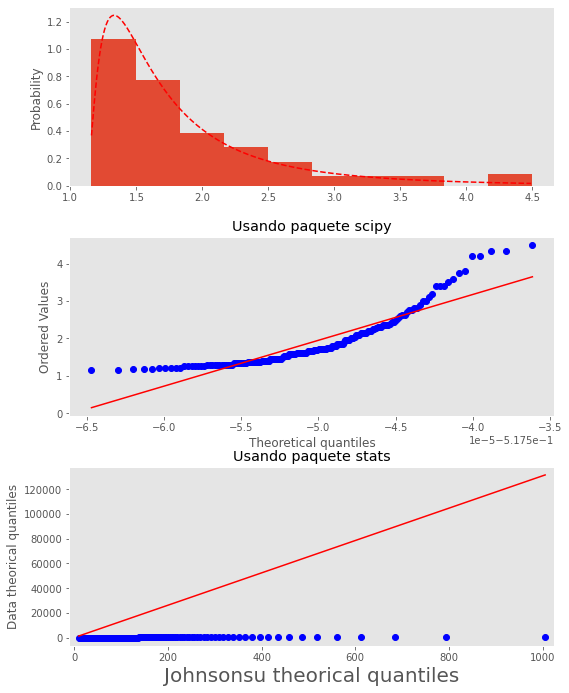

In [41]:
measurements = Mu1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'johnsonsu'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements, dist=dist, line='s', fit=True, ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

#### LOGNORM

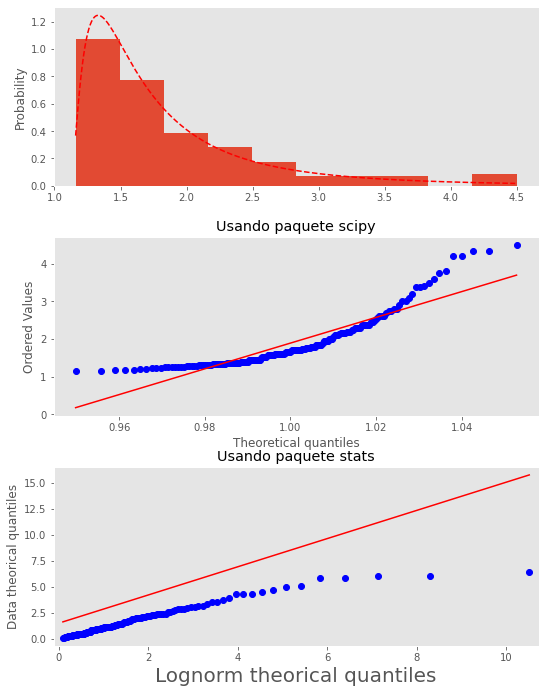

In [42]:
measurements = Mu1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'lognorm'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements, dist=dist, line='s', fit=True, ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Prueba chi cuadrada

**Para los datos totales de Manchester United**


$H_0$: LOGNORM es la distribución de los valores 

$H_a$: LOGNORM no es la distribución de los valores 

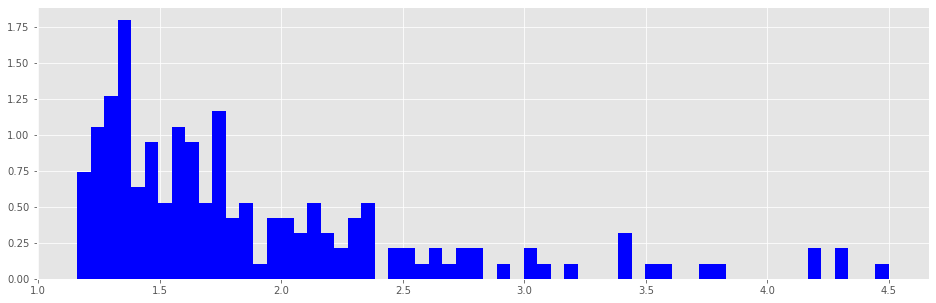

media muestral =2.802167, desviación estándar muestral =0.964041
media real =2.169000, desviación real muestral =1.376219


In [43]:
# Prueba chi-cuadrada
J = 60  # Cantidad de particiones del histograma
[freqs,xs,p]=plt.hist(Mu1,J,density=True, color='blue')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xs = xs[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xs)
sigmas = np.std(xs)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(Mu.mean(),Mu.std()))

In [44]:
pi = st.mielke.pdf(xs,params[0],params[1],params[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = xs*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(Mu.mean(),Mu.std()))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=16.5217221712061, pvalue=0.99999999174555)
Estadístico de chi_cuadrado =  74.46832415930936
Media muestral = 2.802167 
Desviación estándar muestral =0.964041 
media real =2.169000, desviación real muestral =1.376219


Se acepta $H_0$ por su $p-value$, el cual nos dice que con un 95% de confianza, nuestros datos se distribuyen *lognorm*.

### Montecarlo

(array([3.44824032e-01, 1.13280376e-02, 1.75656280e-03, 3.58482204e-04,
        1.43392881e-04, 3.58482204e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.58482204e-05]),
 array([ 1.1143835 ,  3.90392225,  6.69346101,  9.48299976, 12.27253851,
        15.06207727, 17.85161602, 20.64115478, 23.43069353, 26.22023229,
        29.00977104]),
 <a list of 10 Patch objects>)

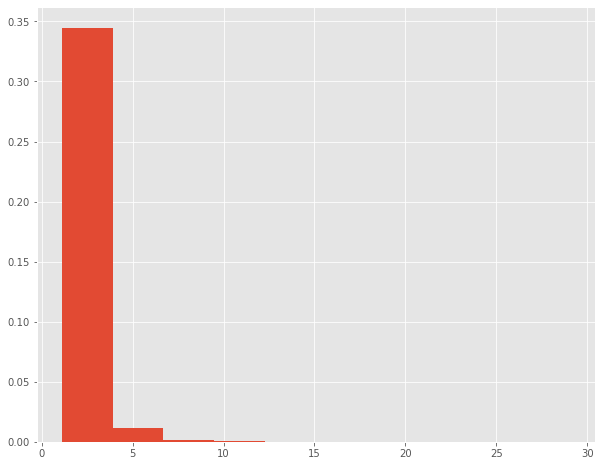

In [50]:
Muw=lognorm.rvs(params[0],params[1],params[2], size = N)
plt.figure(figsize=(10,8))
plt.hist(Muw,density=True)

In [46]:
MOMIO_MANU=mediaM(Muw,N,N)
STD_MOMIO=DESVM(Muw,N,N)
MOMIO_MANU

1.915962148841417

### Intervalos de Confianza

In [47]:
confianza = 0.95
u = np.random.uniform(MOMIO_MANU, STD_MOMIO,10000)  
st.sem
ic1 = st.t.interval(confianza,MOMIO_MANU-1, loc=MOMIO_MANU, scale=st.sem(u))
ic2 = st.norm.interval(confianza, loc=MOMIO_MANU, scale=st.sem(u))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,ic1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,ic2))
print('Media calculada' , MOMIO_MANU)

Con una confianza de 0.95 la media estará en el intervalo t,
 (1.8786083217894494, 1.9533159758933845)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (1.9113346261725692, 1.9205896715102646)
Media calculada 1.915962148841417


### Conclusión Nodo 2

El momio esperado para Manchester United en el caso que sea campeón es de 1.916 con un posible cambio entre el intervalo $(1.9113, 1.9206)$, todo esto con un 95% de confianza.

## Nodo 3

> 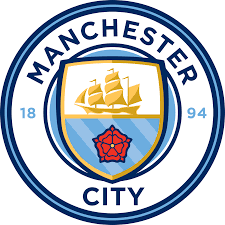
> - Manchester city ha sido el equipo que más veces ha aparecido en el pálmares ingles en los últimos años, por esa razón su aparición es importante en el proyecto.
> - Las variables a simular son los momios si el equipo ganaría, serían dos simulaciones, una para los momios de victoria de local y la otra de visitante. Todo esto para conocer el valor esperado del momio.

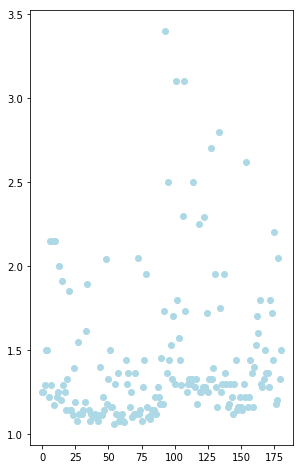

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(City)),City,color='lightblue')

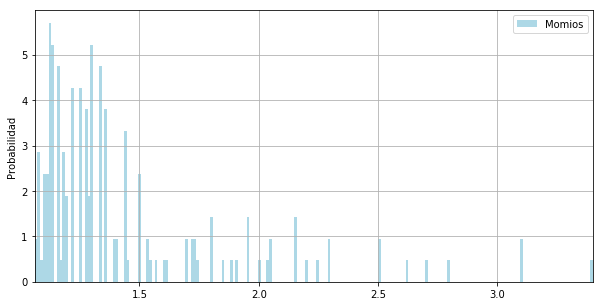

In [8]:
suic=pd.DataFrame({'City': (City.iloc[1:,])})
list_acc=list(City.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='lightblue')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

In [43]:
City1=City[(np.abs(st.zscore(City)) < 3.5)]
City1

4       1.25
28      1.25
44      1.29
74      1.50
89      1.50
        ... 
1708    1.18
1729    1.20
1742    2.05
1756    1.33
1764    1.50
Length: 178, dtype: float64

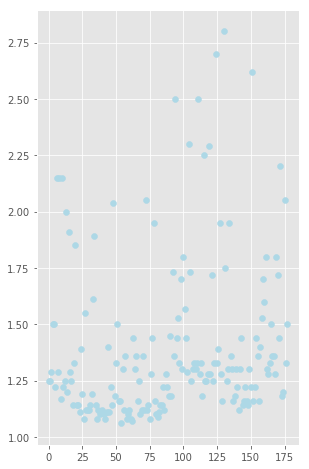

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.scatter(np.arange(0,len(City1)),City1,color='lightblue')

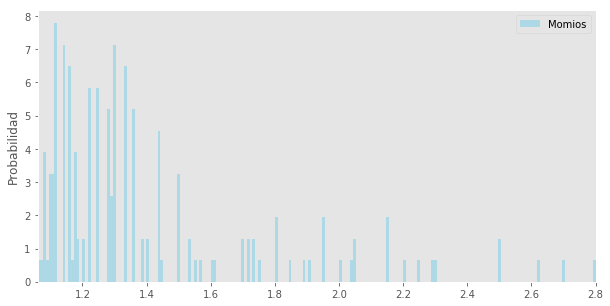

In [45]:
suic=pd.DataFrame({'City': (City1.iloc[1:,])})
list_acc=list(City1.iloc[1:,])
x=list(filter(lambda num: num != 0, list_acc))

bins=200
plt.figure(figsize=(10,5))
plt.hist(x, bins, density= True, label= "Momios", color='lightblue')
plt.xlim((min(list_acc),max(list_acc)))
plt.legend(loc="best")
plt.ylabel('Probabilidad')
plt.grid()
plt.show()

### Método de Máxima Verosimilitud (MLE)

Text(0, 0.5, 'Frecuencia')

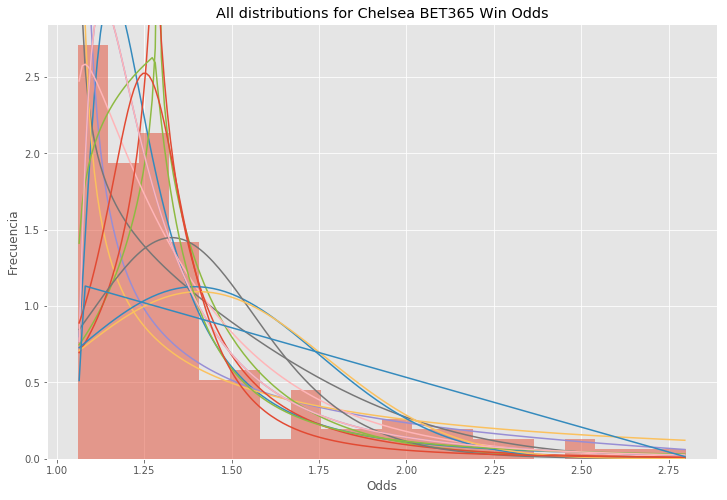

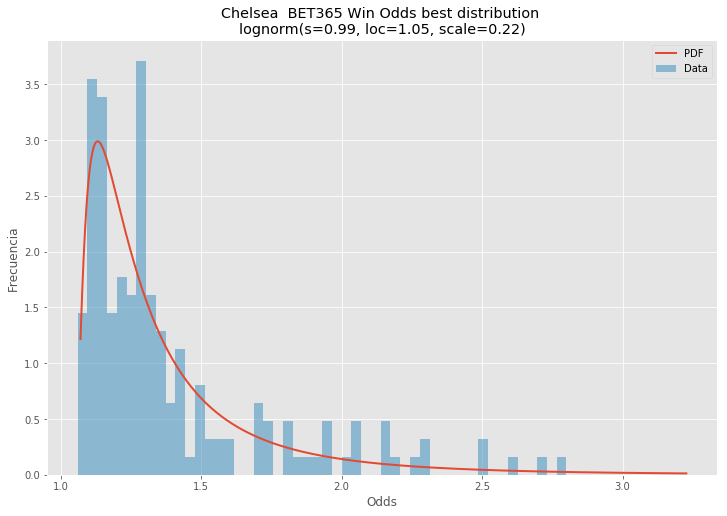

In [46]:
data = City1
matplotlib.rcParams['figure.figsize'] = (16.0, 5.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    #DISTRIBUTIONS = [        
        #st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        #st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        #st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        #st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        #st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        #st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        #st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        #st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        #st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    #]

    DISTRIBUTIONS = [st.alpha, st.beta, st.chi,st.chi2,st.dgamma, st.gamma,st.gennorm, st.norm,st.johnsonsu, st.logistic,st.loggamma,
                    st.loglaplace,st.lognorm, st.t, st.triang]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass
                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = pd.Series(data)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=20, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All distributions for Chelsea BET365 Win Odds')
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Chelsea  BET365 Win Odds best distribution \n' + dist_str)
ax.set_xlabel(u'Odds')
ax.set_ylabel('Frecuencia')

In [47]:
dist_City,parametros_City=best_fit_distribution(City1)
dist_City,parametros_City

('lognorm', (0.9855798859124841, 1.0479274157039997, 0.22005601669294014))

Tenemos que nuestra mejor distribución es $lognorm$ con parámetros (c=0.9855,loc=1.04,scale=0.22).

### Kernel Density Estimation (KDE)

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


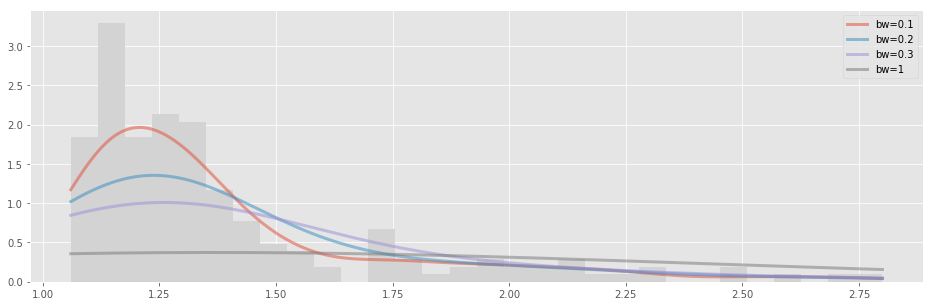

In [48]:
x_grid = np.linspace(min(City1),max(City1), 1000)
fig, ax = plt.subplots()
for bandwidth in [.1,.2,.3,1]:
    ax.plot(x_grid, kde_sklearn(City,x_grid, bandwidth=bandwidth),
        label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(City1, 30, fc='lightgray', histtype='stepfilled', alpha=1, density=True)
#ax.set_xlim(1, 5)
ax.legend(loc='upper right')

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


{'bandwidth': 0.1}


C:\Users\Pica\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


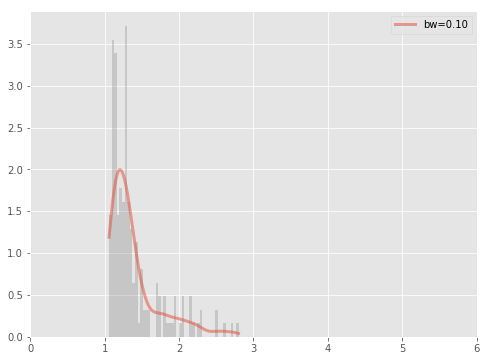

In [49]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 100)},
                    cv=20) # 20-fold cross-validation
grid.fit(City1[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(City1, bins=50, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper right')
ax.set_xlim(0, 6);

Se observa que el mejor bandwidth es de 0.1.

### Método Aceptación-Rechazo

In [67]:
def kde_sklearn(x, x_grid, bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x: np.exp(kde_skl.score_samples(x[:, np.newaxis]))
    return pdf

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


El máximo de f es: 1.9951417729517023


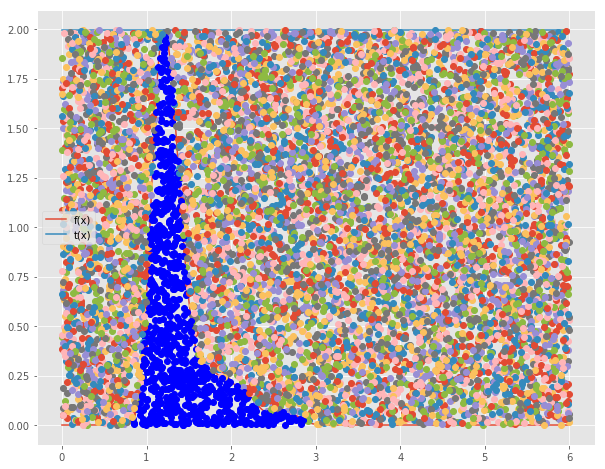

In [68]:
x_grid = np.linspace(0, 6, 1000)
data1 = np.asarray(pd.Series(City1))
f = kde_sklearn(data1, x_grid, bandwidth=0.1)
# Máximo de la función f
max_f = max(f(City1))
# Función t
t = lambda x: max_f*np.ones(len(x))
x = np.arange(0,6,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
Acep_rechazo(R2,R1,f,t)

C:\Users\Pica\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


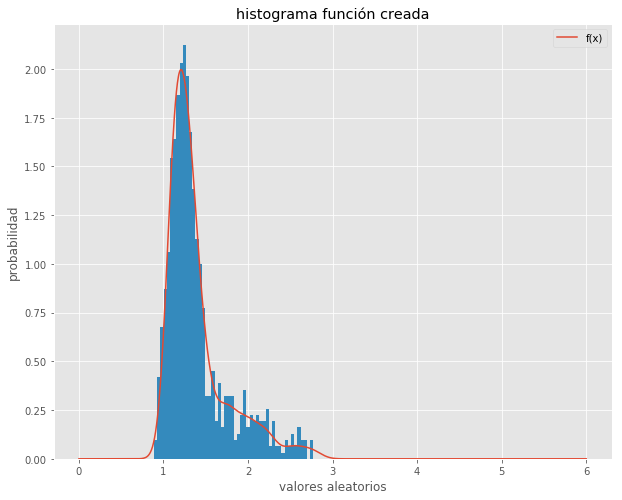

In [69]:
# Función objetivo 
f = kde_sklearn(City1, x_grid, bandwidth=0.1)
x = np.linspace(0,6,1000) # Rango donde se graficará las funciones
# Gráfica de la función
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label='f(x)')
plt.legend()

t = lambda x: max_f*np.ones(len(x))
N = 10000
R2 = np.random.rand(N)
R1 = np.random.uniform(0,6,N)
histograma(R2, R1, f, t)

## Prueba de Kolmogorov-Smirnov

In [70]:
DISTRIBUTIONS = ['alpha', 'beta', 'chi','chi2','dgamma', 'gamma','gennorm', 'norm','johnsonsu', 'logistic','loggamma',
                    'loglaplace','lognorm', 't', 'triang']
results = []
for i in DISTRIBUTIONS:
    dist = getattr(st,i)
    param = dist.fit(data)
    a = st.kstest(data, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

C:\Users\Pica\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Pica\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Pica\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3785: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


johnsonsu: statistic=0.06092903973061092, pvalue=0.5124630126636478
lognorm: statistic=0.061039082164496106, pvalue=0.5099817387224941
alpha: statistic=0.07809044869942239, pvalue=0.21650528266122215
loglaplace: statistic=0.09181393529767318, pvalue=0.09338023663325745
gamma: statistic=0.10531737785535111, pvalue=0.03576600323683565
gennorm: statistic=0.171617467421105, pvalue=4.707463836384207e-05
t: statistic=0.17298682902087867, pvalue=3.9676164662161284e-05
logistic: statistic=0.18017403356348408, pvalue=1.580818149560237e-05
chi: statistic=0.18215748178474067, pvalue=1.218028490646006e-05
dgamma: statistic=0.18234272436156526, pvalue=1.1885515904141997e-05
norm: statistic=0.2310894602291485, pvalue=7.696951298541421e-09
loggamma: statistic=0.23783805301373956, pvalue=2.4161801448485676e-09
beta: statistic=0.24944479377416118, pvalue=3.0344216028765914e-10
chi2: statistic=0.2695864059428643, pvalue=6.4641625385775114e-12
triang: statistic=0.38331471886017376, pvalue=0.0


### Método Quantil-Quantil

#### JOHNSONU

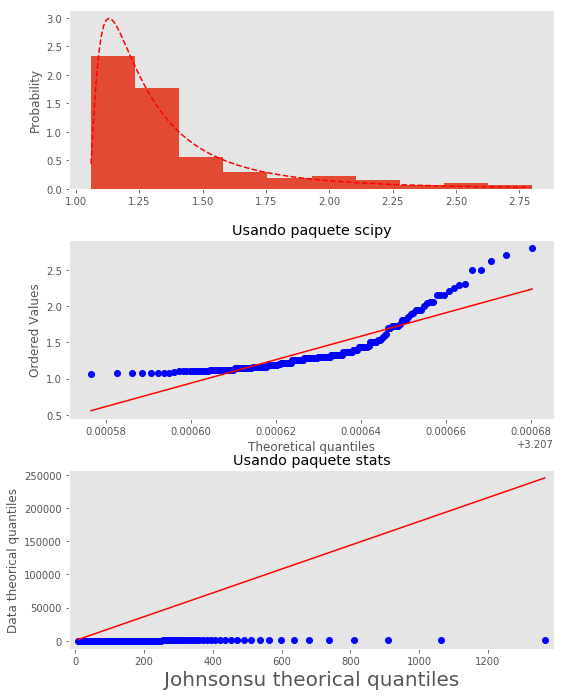

In [71]:
measurements = City1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'johnsonsu'
params = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements, dist=dist, line='s', fit=True, ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

#### LOGNORM

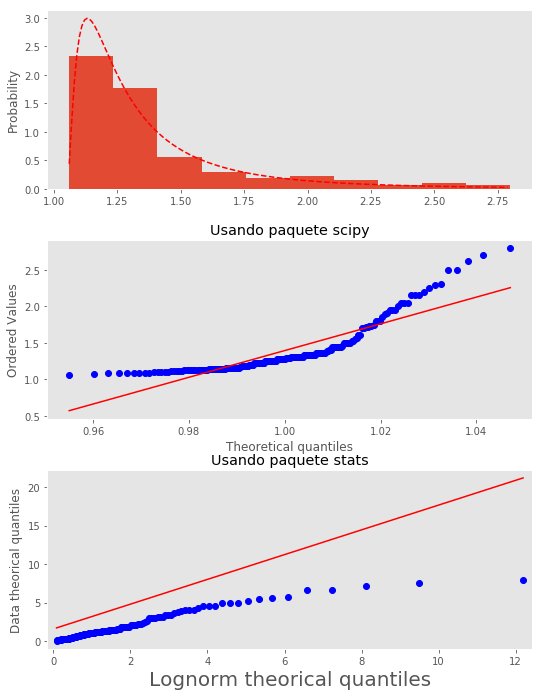

In [72]:
measurements = City1
# Histograma de las variables creadas
divisiones = 10 # Cantidad de barras en el histograma
fig, ax = plt.subplots(3,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

ax[0].hist(measurements,divisiones,density=True)

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'lognorm'
params_l = getattr(st, dist).fit(measurements)

# Graficar PDF de la distribución que queremos probar

x = np.arange(measurements.min(), measurements.max(), .01)
y = getattr(st, dist).pdf(x, *params_l)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')
ax[0].grid()

# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist)
# Usando scipy
grap2 = st.probplot(measurements, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

grap1 = sm.qqplot(measurements, dist=dist, line='s', fit=True, ax=ax[2])
ax[2].grid()
ax[2].set_title('Usando paquete stats')

plt.xlabel(f'{dist.title()} theorical quantiles',size=20)
plt.ylabel('Data theorical quantiles')
plt.show()

## Prueba chi cuadrada

**Para los datos totales de Manchester City**


$H_0$: LOGNORM es la distribución de los valores 

$H_a$: LOGNORM no es la distribución de los valores 

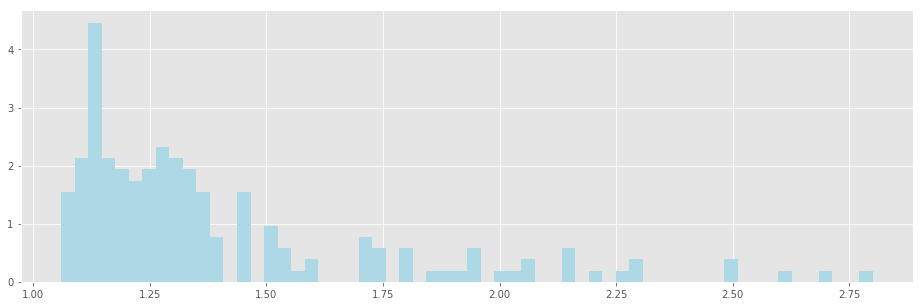

media muestral =1.915500, desviación estándar muestral =0.502225
media real =1.395618, desviación real muestral =0.354946


In [73]:
#Prueba chi-cuadrada
J = 60  # Cantidad de particiones del histograma
[freqs,xs,p]=plt.hist(City1,J,density=True, color='lightblue')
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
xs = xs[:-1] 

# Media y desviación estándar muestral
mus = np.mean(xs)
sigmas = np.std(xs)
print('media muestral =%f, desviación estándar muestral =%f'%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(City1.mean(),City1.std()))

In [74]:
pi = st.lognorm.pdf(xs,parametros_City[0],parametros_City[1],parametros_City[2])
# Cálculo de la esperanza usando la expresión teórica
Ei = xs*pi

# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(freqs,Ei)
print('Valor de chi cuadrado librería = ',Xs)

# Cálculo de Grados de libertad del estadístico
p = 1000 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.95,df=m)
print('Estadístico de chi_cuadrado = ',Chi_est2)
print('Media muestral = %f \nDesviación estándar muestral =%f '%(mus,sigmas))
print('media real =%f, desviación real muestral =%f'%(City1.mean(),City1.std()))

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=16.842657897307443, pvalue=0.9999999875109475)
Estadístico de chi_cuadrado =  nan
Media muestral = 1.915500 
Desviación estándar muestral =0.502225 
media real =1.395618, desviación real muestral =0.354946


(array([1.62660445, 0.26702404, 0.07949571, 0.03669033, 0.01019176,
        0.00815341, 0.0040767 , 0.00203835, 0.00203835, 0.00203835]),
 array([1.05286018, 1.54345271, 2.03404525, 2.52463778, 3.01523032,
        3.50582285, 3.99641539, 4.48700793, 4.97760046, 5.468193  ,
        5.95878553]),
 <a list of 10 Patch objects>)

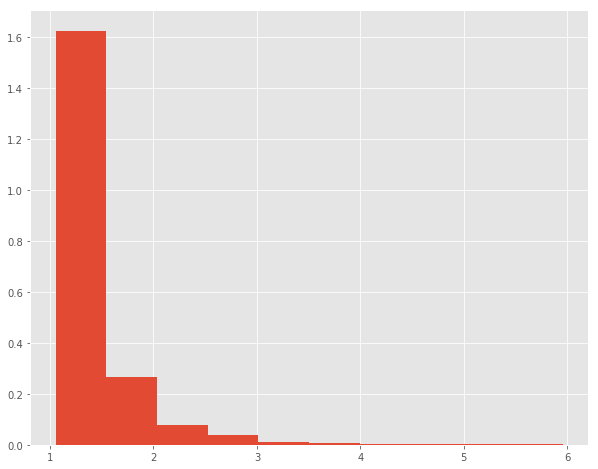

In [75]:
#histograma
N=1000
#City_M=lognorm.rvs(parametros_City[0],parametros_City[1],parametros_City[2], size = N)
City_M=lognorm.rvs(params_l[0],params_l[1],params_l[2], size = N)
plt.figure(figsize=(10,8))
plt.hist(City_M,density=True)

In [76]:
def simuladorganar(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector'):
    aleatorio= np.random.randint(CantMuestras)
    Momios= Vector[aleatorio]
    return Momios
def mediaM(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCMomios= [simuladorganar(Vector, CantMuestras) for i in range(N)]
    MeanMCMomios= np.mean(MCMomios)
    return MeanMCMomios
def DESVM(Vector:'Vector donde están las muestras', CantMuestras: 'Lenght del vector',
               N: 'Numero de simulaciones'):
    MCMomios= [simuladorganar(Vector, CantMuestras) for i in range(N)]
    DESVMCMomios= np.std(MCMomios)
    return DESVMCMomios

In [77]:
MOMIO_City=mediaM(City_M,N,N)
STD_MOMIO=DESVM(City_M,N,N)
MOMIO_City

1.3854643872990524

In [78]:
confianza = 0.95
u = np.random.uniform(MOMIO_City, STD_MOMIO,10000)  
st.sem
ic1 = st.t.interval(confianza,MOMIO_City-1, loc=MOMIO_City, scale=st.sem(u))
ic2 = st.norm.interval(confianza, loc=MOMIO_City, scale=st.sem(u))
print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,ic1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,ic2))
print('Media calculada' , MOMIO_City)

Con una confianza de 0.95 la media estará en el intervalo t,
 (-0.946897622907809, 3.717826397505914)
Con una confianza de 0.95 la media estará en el intervalo normal,
 (1.3799825920261717, 1.3909461825719331)
Media calculada 1.3854643872990524
